## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [3]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We'll start by filtering out columns and keeping only: price, bedrooms, bathrooms, sqft_living, floors, and waterfront.

In [4]:
filter = king_county[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']]

Next create a pair plot in Seaborn to see the relationships between your features.

In [5]:
# sns.pairplot(filter)
# plt.show()

There are two noticeable outliers here that will cause problems. Remove them.

In [6]:
filter = filter[filter['bedrooms'] != 33]
filter = filter[filter['sqft_living'] != 12050]
filter = filter[filter['sqft_living'] != 13540]
filter = filter[filter['price'] != 6885000.]
filter = filter[filter['price'] != 7062500.]

In [7]:
np.sort(filter['price'].unique())

array([  75000.,   78000.,   80000., ..., 5300000., 5350000., 5570000.])

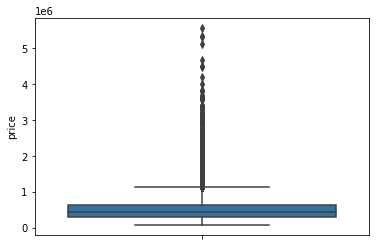

In [8]:
ax = sns.boxplot(y='price', data=filter)

In [9]:
# from scipy.stats import zscore
# threshold = 3
# # zscores = []
# # cols = filter.columns
# for i in filter.columns:
#   print(i)
#   print(np.where(zscore(filter[i]) > threshold))
#   # print(zscore(filter[i]))
# #   zscores = zscores.append([i, zscore])

# # zscores
# # print(np.where(zscores > threshold))
# # print(len((np.where(zscores > threshold)[0])))

# # zscore(filter['price'])

In [10]:
# threshold = 1.5
# for i in filter.columns:
#   print(i)
#   q75, q25 = np.percentile(filter[i], [75 ,25])
#   iqr = q75 - q25
#   # for threshold in np.arange(1,5,0.5):
#   min_val = q25 - (iqr*threshold)
#   max_val = q75 + (iqr*threshold)
#   num_outliers = len((np.where(filter[i] > max_val) | (filter[i] < min_val)[0]))
#   # print(f'The score threshold is: {threshold}')
#   print(f'Number of outliers is: {num_outliers}')

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [11]:
def missingness_summary(df, print_log, sort):
  '''
  Return a pandas series containing the percentage of missing data in each column.
  
  Args:
  df - pandas dataframe 

  print_log (boolean) - if True, print out all of the columns in the dataframe, 
    one to a line, followed by the percentage of total rows that have a 
    null value for that column.
    
  sort (string) - specify if the output should be sorted in ascending order, 
    descending order, or not at all.
  '''
  if print_log == True:
    series = pd.Series(df.isnull().sum()*100/df.isnull().count())
    if sort == 'Ascending':
      series = series.sort_values(ascending = True)
    elif sort == 'Descending':
      series = series.sort_values(ascending=False)
    else:
      series
    return series

In [12]:
missingness_summary(filter, True, 'Descending')
filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21608 non-null  float64
 1   bedrooms     21608 non-null  int64  
 2   bathrooms    21608 non-null  float64
 3   sqft_living  21608 non-null  int64  
 4   floors       21608 non-null  float64
 5   waterfront   21608 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
y = filter['price']
X = filter.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [14]:
X_con = sm.add_constant(X_train)

fit = sm.OLS(y_train, X_con).fit()

# print(fit.summary())

In [15]:
predictions = fit.predict(X_con)
resid = fit.resid

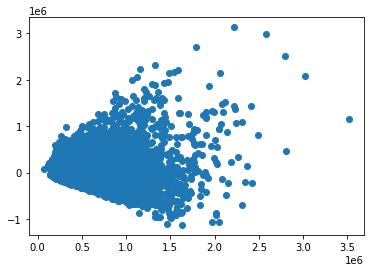

In [16]:
plt.scatter(predictions, resid)
plt.show()

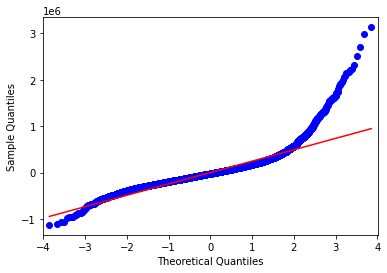

In [17]:
sm.qqplot(resid.values, line='s')
plt.show()

Create your final linear model and produce a model summary. Look at the coefficients and interpret their meaning. How do each of them influence the final prediction?

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(X_con.values, i) for i in range(X_con.shape[1])], index=X_con.columns)
vif

const          19.644150
bedrooms        1.608372
bathrooms       2.798846
sqft_living     2.670392
floors          1.350761
waterfront      1.016505
dtype: float64

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE. How accurate is our model?

In [19]:
X_t_con = sm.add_constant(X_test)
y_pred = fit.predict(X_t_con)
resid = y_test - y_pred

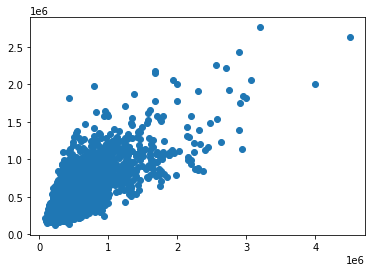

In [20]:
plt.scatter(y_test, y_pred)
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
# from statsmodels.tools.eval_measures import rmse

In [22]:
print(y_test.shape)
print(y_pred.shape)

(4322,)
(4322,)


In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mse(y_test, y_pred)
rmse = rmse(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred)/y_test) * 100)

In [28]:
print(f"Mean absolute error of the prediction is: {mae}")
print(f"Mean squared error of the prediction is: {mse}")
print(f"Root mean squared error of the prediction is: {rmse}")
print(f"Mean absolute percentage error of the prediction is: {mape}")


Mean absolute error of the prediction is: 165433.74623097404
Mean squared error of the prediction is: 56385339413.52617
Root mean squared error of the prediction is: 237455.97363201072
Mean absolute percentage error of the prediction is: 34.61605332726016
